<a href="https://www.kaggle.com/code/rinichristy/k-means-clustering-on-mushroom-quality?scriptVersionId=92980252" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **K-Means Clustering**
K-means clustering algorithms follow an iterative process to reassign the data points between clusters based upon the distance. This clustering method classifies the information into multiple groups based on the characteristics and similarity of the data. Objects within a cluster are very similar, and objects across different clusters are very different or dissimilar. the objective of K-Means is to form clusters in such a way that similar samples go into a cluster, and dissimilar samples fall into different clusters, it can be shown that instead of a similarity metric, we can use dissimilarity metrics. K-Means tries to minimize the intra-cluster distances and maximize the inter-cluster distances.

Some real-world applications of k-means:
- Customer segmentation
- Understand what the visitors of a website are trying to accomplish
- Pattern recognition
- Machine learning
- Data compression

## **Table of Contents**

* [Dataset Information](#Dataset)
* [Method Development: Setting up the K Means Clustering](#Method)
* [Model Evaluation](#Evaluation)

### **Import required library packages:**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Data Set Information: Mushroom Quality data**<a name="Dataset"></a>
This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family . Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one.
Attribute Information:
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

### **Load the Mushroom quality data**

In [2]:
df = pd.read_csv('../input/uci-mushroom-dataset/Mushroom data.csv')
df.head()

,Mushroom_quality,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### **Data Preprocessing**

In [3]:
df =df[['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalkshape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat', 'Mushroom_quality']]
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalkshape,...,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,Mushroom_quality
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [4]:
print(df.size)
print(df.shape)
print(df.ndim)

186852
(8124, 23)
2


### **Label Encoding**

Some features in this dataset are categorical such as Sex or BP. Unfortunately, Sklearn Decision Trees do not handle categorical variables. To convert these features to numerical values, LabelEncoder from sklearn.preprocessing can be used to convert categorical variable into dummy/indicator variables.

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gill_attachment'] = le.fit_transform(df['gill_attachment'])
df['cap_shape'] = le.fit_transform(df['cap_shape'])
df['cap_surface'] = le.fit_transform(df['cap_surface'])
df['cap_color'] = le.fit_transform(df['cap_color'])
df['odor'] = le.fit_transform(df['odor'])
df['gill_color'] = le.fit_transform(df['gill_color'])
df['stalk_root'] = le.fit_transform(df['stalk_root'])
df['stalk_surface_above_ring'] = le.fit_transform(df['stalk_surface_above_ring'])
df['stalk_surface_below_ring'] = le.fit_transform(df['stalk_surface_below_ring'])
df['stalk_color_above_ring'] = le.fit_transform(df['stalk_color_above_ring'])
df['stalk_color_below_ring'] = le.fit_transform(df['stalk_color_below_ring'])
df['veil_color'] = le.fit_transform(df['veil_color'])
df['ring_number'] = le.fit_transform(df['ring_number'])
df['ring_type'] = le.fit_transform(df['ring_type'])
df['spore_print_color'] = le.fit_transform(df['spore_print_color'])
df['population'] = le.fit_transform(df['population'])
df['habitat'] = le.fit_transform(df['habitat'])

df['gill_spacing'] = df['gill_spacing']['c']= 1
df['gill_spacing'] = df['gill_spacing']['w']= 0

df['gill_size'] = df['gill_size'].replace({'b' : 1, 'n' : 0})

df['stalkshape'] = df['stalkshape'].map({'e': 1, 't': 0})
df["veil_type"] = df["veil_type"].apply({'u':1, 'p':0}.get)
df['bruises'] = df['bruises'].replace({'t' : 1, 'f' : 0})

# def convert(column):
#   if column =='Yes':
#        return 1
#    else:
#        return 0
# df['column'] = df['column'].apply(convert)



df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap_shape                 8124 non-null   int64 
 1   cap_surface               8124 non-null   int64 
 2   cap_color                 8124 non-null   int64 
 3   bruises                   8124 non-null   int64 
 4   odor                      8124 non-null   int64 
 5   gill_attachment           8124 non-null   int64 
 6   gill_spacing              8124 non-null   int64 
 7   gill_size                 8124 non-null   int64 
 8   gill_color                8124 non-null   int64 
 9   stalkshape                8124 non-null   int64 
 10  stalk_root                8124 non-null   int64 
 11  stalk_surface_above_ring  8124 non-null   int64 
 12  stalk_surface_below_ring  8124 non-null   int64 
 13  stalk_color_above_ring    8124 non-null   int64 
 14  stalk_color_below_ring  

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
df['Mushroom_quality'] = df['Mushroom_quality'].replace({'e' : 0, 'p' : 1})

In [7]:
# X = df.iloc[:,:-1]  
# X = df.drop('Mushroom_quality',axis=1)
# X = df[[cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalkshape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']] .values  #.astype(float)
X = df.loc[:, df.columns != 'Mushroom_quality']
X.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalkshape,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,5,2,4,1,6,1,0,0,4,1,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,1,4,1,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,1,5,1,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,0,5,1,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,0,1,4,0,...,2,7,7,0,2,1,0,3,0,1


In [8]:
y_test = df["Mushroom_quality"]
y_test[0:5]

0    1
1    0
2    0
3    1
4    0
Name: Mushroom_quality, dtype: int64

### **Normalizing over the standard deviation**
Now normalize the dataset. Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. Use StandardScaler() to normalize the dataset.

In [9]:
from sklearn.preprocessing import StandardScaler
#X = X.values
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

## **Method Development:**<a name="Method"></a>
### **Setting up K-Means**<a name="SetUP"></a>
The KMeans class has many parameters that can be used, but we will be using these three:

**init:** Initialization method of the centroids. 
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
**n_clusters:** The number of clusters to form as well as the number of centroids to generate. 
    <ul>
    <li>Value will be: 2 (since we have 4 centers)</li> 
    </ul>
**n_init:** Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. 
    <ul> 
    <li> Value will be: 12 </li> 
    </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called **k_means**.

In [10]:
from sklearn.cluster import KMeans
clusterNum = 2
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(Clus_dataSet)
labels = k_means.labels_
print(labels)

[0 0 0 ... 0 1 0]


**Assign the labels to each row in dataframe.**

In [11]:
df["Cluster"] = labels
df.head(5)

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalkshape,...,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,Mushroom_quality,Cluster
0,5,2,4,1,6,1,0,0,4,1,...,7,0,2,1,4,2,3,5,1,0
1,5,2,9,1,0,1,0,1,4,1,...,7,0,2,1,4,3,2,1,0,0
2,0,2,8,1,3,1,0,1,5,1,...,7,0,2,1,4,3,2,3,0,0
3,5,3,8,1,6,1,0,0,5,1,...,7,0,2,1,4,2,3,5,1,0
4,5,2,3,0,5,1,0,1,4,0,...,7,0,2,1,0,3,0,1,0,0


## **Model Insights & Evaluation - K Means Clustering**<a name="Evaluation"></a>

### **Visualize the distribution of Mushrooms based on their Cap color and Odor**

#### **Colour encoding with Cluster label & size encoding with ring number**

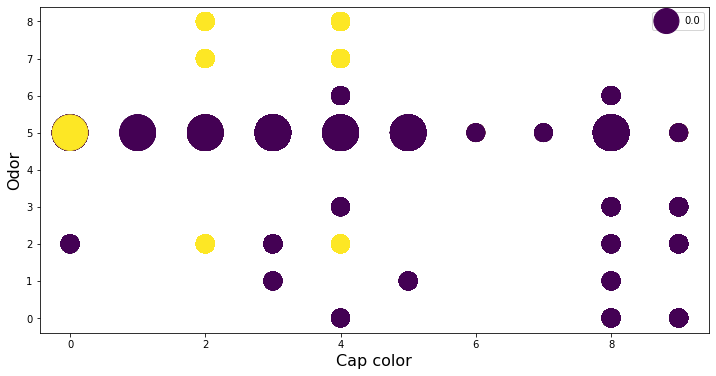

In [12]:
area = np.pi * (df['ring_number'])**2 
plt.figure(figsize = (12,6))
plt.scatter(df['cap_color'], df['odor'], s= 100 * area, c=labels.astype(float))
plt.xlabel('Cap color', fontsize=16)
plt.ylabel('Odor', fontsize=16)
plt.legend(labels.astype(float))
plt.show();

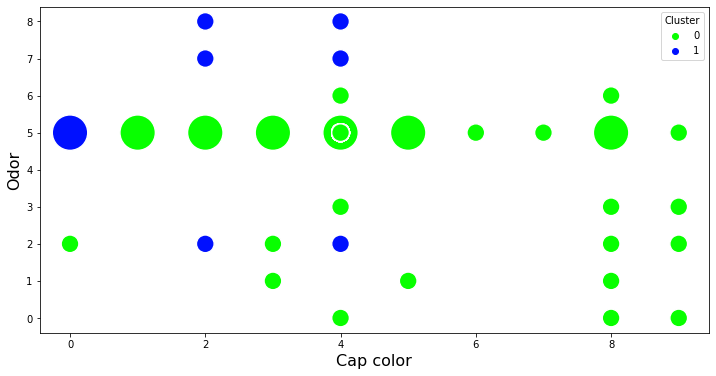

In [13]:
area = np.pi * (df['ring_number'])**2 
plt.figure(figsize = (12,6))
sns.scatterplot(x='cap_color', y='odor', data =df, hue = 'Cluster', palette = 'hsv', s=100* area)
plt.xlabel('Cap color', fontsize=16)
plt.ylabel('Odor', fontsize=16);

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  after removing the cwd from sys.path.


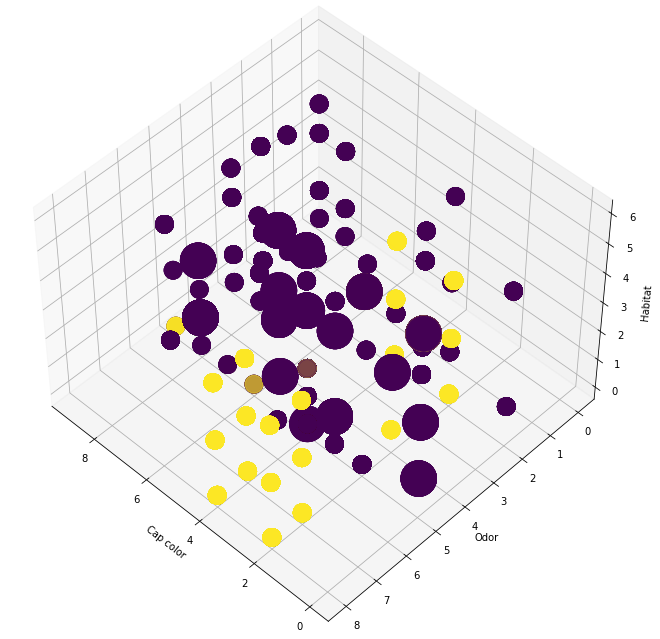

In [14]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(9, 9))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
#plt.ylabel('Odor', fontsize=18)
#plt.xlabel('Cap color', fontsize=16)
#plt.zlabel('Ring number', fontsize=16)
ax.set_xlabel('Cap color')
ax.set_ylabel('Odor')
ax.set_zlabel('Habitat')
ax.scatter(df['cap_color'], df['odor'], df['habitat'], c= labels.astype(float), s=100* area);

#### **Colour encoding with Mushroom quality & size encoding with ring number**

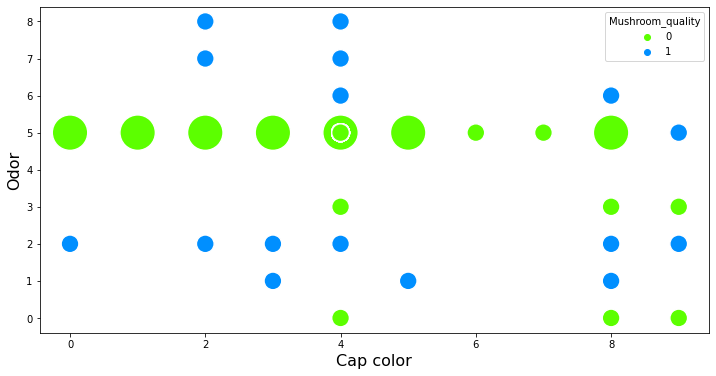

In [15]:
area = np.pi * (df['ring_number'])**2 
plt.figure(figsize = (12,6))
sns.scatterplot(x='cap_color', y='odor', data =df, hue = 'Mushroom_quality', palette = 'gist_rainbow', s=100* area)
plt.xlabel('Cap color', fontsize=16)
plt.ylabel('Odor', fontsize=16);

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  after removing the cwd from sys.path.


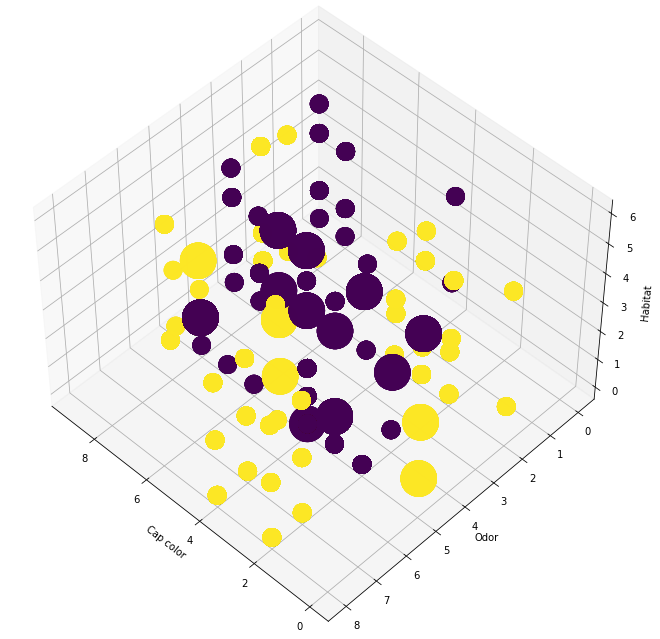

In [16]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(9, 9))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
#plt.ylabel('Odor', fontsize=18)
#plt.xlabel('Cap color', fontsize=16)
#plt.zlabel('Ring number', fontsize=16)
ax.set_xlabel('Cap color')
ax.set_ylabel('Odor')
ax.set_zlabel('Habitat')
ax.scatter(df['cap_color'], df['odor'], df['habitat'], c= y_test.astype(float), s=100* area);

### **KEY PERFORMANCE INDICATORS (KPI): Generating the Confusion Matrix and Classification report**

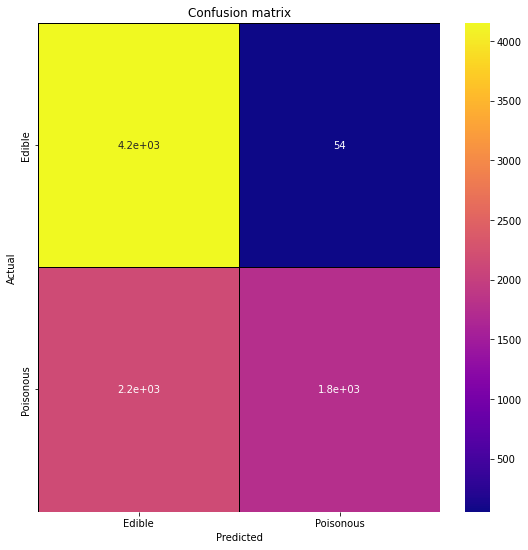

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = k_means.predict(Clus_dataSet)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
plt.title('Confusion matrix')
sns.heatmap(cm, annot=True, cmap = 'plasma',  linecolor='black', linewidths=1)
plt.xlabel("Predicted")
plt.ylabel("Actual");
plt.xticks(np.arange(0.5, 2.5), ['Edible', 'Poisonous'])
plt.yticks(np.arange(0.5, 2.5), ['Edible', 'Poisonous']);

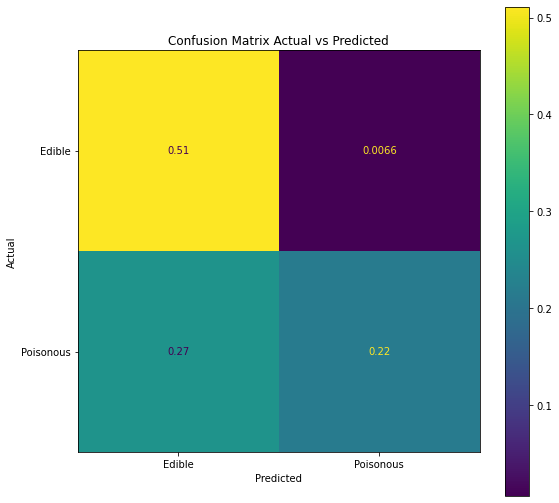

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['Edible', 'Poisonous'])
fig, ax = plt.subplots(figsize=(9,9))
cmd.plot(ax=ax)
cmd.ax_.set(xlabel='Predicted', ylabel='Actual', title='Confusion Matrix Actual vs Predicted');

**Mushrooms with Edible Quality**

The first row is for mushrooms with quality in test set is edible. As can be calculated, out of 8124 mushroom samples, the quality of 4208 of them is edible. And out of these 4208, the K Means Cluster model correctly predicted 4154 of them as edible, and 54 of them as poisonous, which is good. 

It means, for 4154 samples, the actual quality were edible in the original set, and classifier also correctly predicted those as edible. However, while the actual label of 54 samples were edible, the classifier wrongly predicted those as poisonous. 

**Mushrooms with Poisonous Quality**

The classifier correctly predicted only 1752 of them as poisonous, and 2164 of them wrongly as edible. So, it has done a very bad job in predicting the mushroom samples with poisonous quality. Consider it as error of the model for second row.  

A good thing about confusion matrix is that it shows the model’s ability to correctly predict or separate the classes. In specific case of binary classifier, such as this example, these numbers can be interpreted as the count of true positives, false positives, true negatives, and false negatives on the basis of testing for poisonous quality of mushroom samples.

In this case, the model failed to detect 2164 poisonous sample which is a very serious issue to be considered. So Important metric when we care about false negatives is recall. Recall is also called True Positive rate or sensitivity

**Recall**

Recall = TP/ Actual TRUE = TP/ (TP+FN) (when the class was actually TRUE, how often did the classiﬁer get it right?)
<br><br>
$$Recall = \frac{True Positive}{True Positive + False Negative}$$
<br>
$$Recall = \frac{1752}{1752 + 2164} = 0.45$$ 
<br><br>
**Precision**

Precision = TP/Total TRUE Predictions (When model predicted TRUE class, how often was it right?) 

Precision is an important metric when False positives are important. In this case model wrongly predicted 60 edible mushrooms as poisonous. Its not a big deal. 
<br><br>
$$Precision = \frac{True Positives}{True Positives + False Positives}$$
<br>
$$Precision = \frac{1752}{1752+54} = 0.97$$
<br>
Here false negative is to be given more importance than false positives, focus should be on Recall metric. Since recall is very bad, this model should be discarded.

Classiﬁcation Accuracy = (TP+TN) / (TP + TN + FP + FN) 

Misclassiﬁcation rate (Error Rate) = (FP + FN) / (TP + TN + FP + FN) 

In unbalanced datasets, if we have large number of true negatives (healthy patients), accuracy could be misleading. Therefore, F1 score might be a better KPI to use since it provides a balance between recall and precision in the presence of unbalanced datasets. 
F1 Score is an overall measure of a model's accuracy that combines precision and recall. 
F1 score is the harmonic mean of precision and recall. 
<br><br>
$$F1 Score = \frac{2 x Precision x Recall}{Precision + Recall}$$
<br> <br>
$$F1 Score = \frac{2 x TP}{2 x TP + FP +FN}$$

In [19]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
accuracy = (y_pred == y_test).sum() / len(y_test)
print('Accuracy of K Means Clustering model calculated manually is ', accuracy.round(2), '%')
print('Accuracy of K Means Clustering model is {:.2f} % '.format(accuracy_score(y_test, y_pred)))
print('\n', '\n','Confusion Matrix of K Means Clustering model:' '\n', confusion_matrix(y_test, y_pred))
print('\n', '\n','Classification Report for K Means Clustering model:' '\n',classification_report(y_test, y_pred))

Accuracy of K Means Clustering model calculated manually is  0.73 %
Accuracy of K Means Clustering model is 0.73 % 

 
 Confusion Matrix of K Means Clustering model:
 [[4154   54]
 [2164 1752]]

 
 Classification Report for K Means Clustering model:
               precision    recall  f1-score   support

           0       0.66      0.99      0.79      4208
           1       0.97      0.45      0.61      3916

    accuracy                           0.73      8124
   macro avg       0.81      0.72      0.70      8124
weighted avg       0.81      0.73      0.70      8124



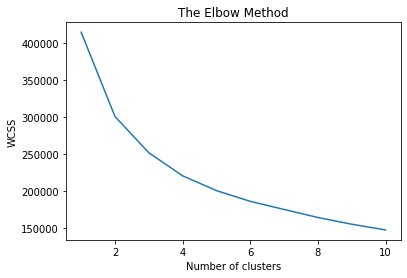

In [20]:
#Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) # init=k-means++ for avoiding to fall into the random initialization trap
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()